In [40]:
import cv2
img_bgr = cv2.imread("C:\\Users\Asus\OneDrive\Desktop\images (1).jpeg")
if img_bgr is None:
    print("Error: Image not loaded. Please check the image path.")

In [41]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


In [42]:

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


In [43]:

threshold = 127
_, img_binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)


In [44]:
import numpy as np
black_pixels = np.sum(img_binary == 0)


In [45]:
height, width = img_gray.shape
image_size = height * width
print(f"Size of the image: {height} x {width}")
print(f"Total pixels: {image_size}")
print(f"Area of black pixels: {black_pixels}")


Size of the image: 168 x 300
Total pixels: 50400
Area of black pixels: 47621


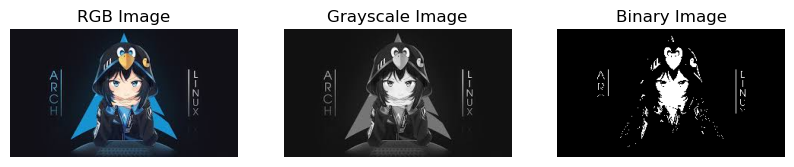

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

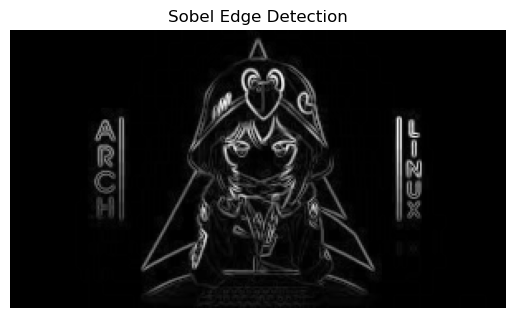

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("C:\\Users\Asus\OneDrive\Desktop\images (1).jpeg", cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

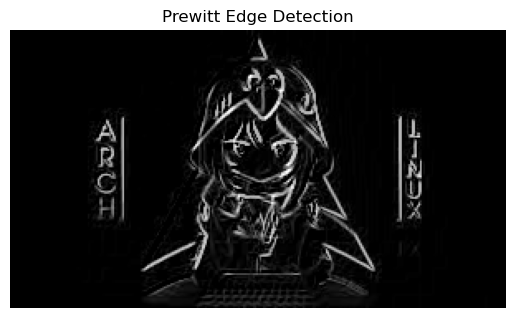

In [53]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x_edges = cv2.filter2D(img, -1, prewitt_x)
prewitt_y_edges = cv2.filter2D(img, -1, prewitt_y)
prewitt_x_edges = np.float64(prewitt_x_edges)
prewitt_y_edges = np.float64(prewitt_y_edges)
prewitt_edges = cv2.magnitude(prewitt_x_edges, prewitt_y_edges)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

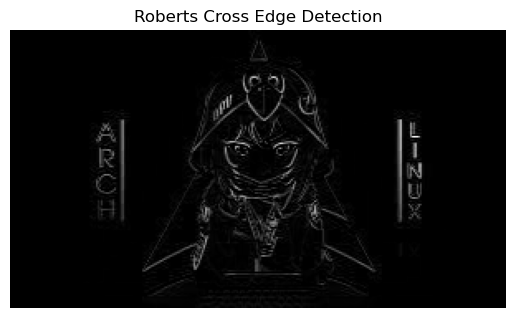

In [55]:
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x_edges = cv2.filter2D(img, -1, roberts_x)
roberts_y_edges = cv2.filter2D(img, -1, roberts_y)
roberts_x_edges = np.float64(roberts_x_edges)
roberts_y_edges = np.float64(roberts_y_edges)
roberts_edges = cv2.magnitude(roberts_x_edges, roberts_y_edges)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()

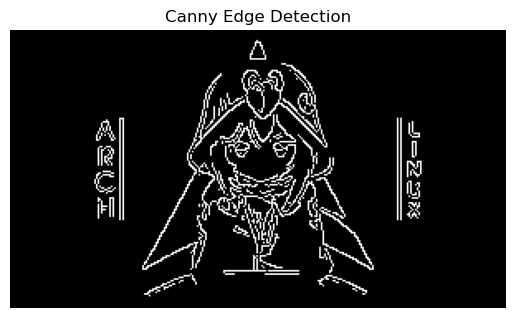

In [56]:
canny_edges = cv2.Canny(img, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


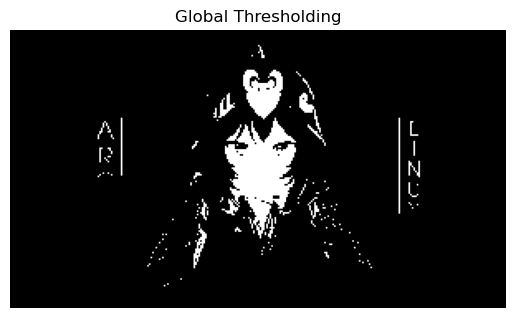

In [57]:
_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()

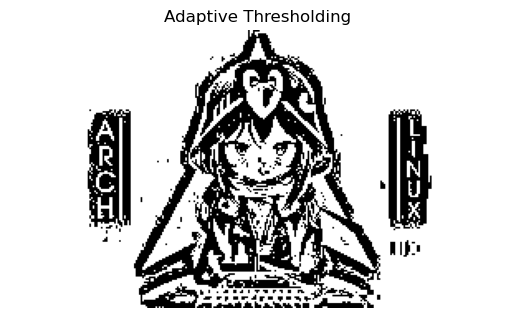

In [59]:

adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


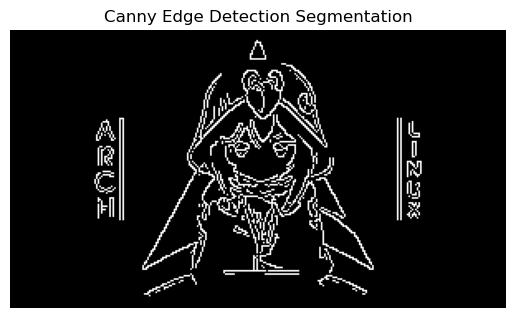

In [60]:

canny_edges_for_segmentation = cv2.Canny(img, 100, 200)
plt.imshow(canny_edges_for_segmentation, cmap='gray')
plt.title('Canny Edge Detection Segmentation')
plt.axis('off')
plt.show()


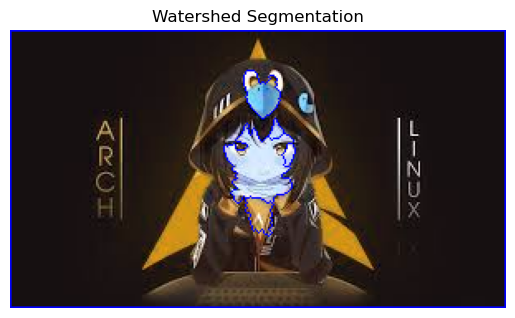

In [62]:

_, binary_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(binary_thresh, kernel, iterations=3)
eroded = cv2.erode(binary_thresh, kernel, iterations=3)


sure_bg = dilated


sure_fg = eroded
unknown = cv2.subtract(sure_bg, sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)


markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(img_bgr, markers)
img_bgr[markers == -1] = [0, 0, 255]  


plt.imshow(img_bgr)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
